###**[4] Neural Networks Using TensorFlow**

**Objective:**
In this lecture, you will learn the basics of neural networks and how to implement them using Python.

We will focus on understanding the structure of a neural network and how to build and train one using TensorFlow/Keras, a popular machine learning library.



### **1. What is a Neural Network?**

A **Neural Network** is a machine learning model inspired by the structure and function of the human brain. It consists of layers of nodes (also called neurons), which are connected in a way that allows the network to learn patterns from data.

#### **Key Components of a Neural Network:**
- **Neurons**: Basic units of a neural network that take input, apply a mathematical operation, and produce an output.
- **Layers**: A neural network is made up of layers of neurons:
  - **Input Layer**: Takes the input features (e.g., pixels in an image, numerical data).
  - **Hidden Layers**: Intermediate layers that process the input data by applying weights and activation functions.
  - **Output Layer**: Produces the final predictions (e.g., class probabilities for classification).
  
- **Weights**: Parameters that are adjusted during training to minimize the error in predictions.
- **Bias**: An additional parameter added to the weighted sum before applying an activation function, helping the model fit the data better.
- **Activation Function**: A mathematical function that determines whether a neuron should be activa ted or not (common examples: Sigmoid, ReLU).

#### **How Neural Networks Learn**:
- Neural networks learn by adjusting weights and biases through a process called **training**.
- The training is done using an algorithm called **backpropagation**, which updates the parameters in the network based on the error from the predictions.

### **2. Structure of a Neural Network:**
Here’s a simple structure of a neural network for classification:

- **Input Layer**: The number of neurons corresponds to the number of features (e.g., 28x28 pixels for images in the MNIST dataset).
- **Hidden Layer(s)**: One or more layers, each with a certain number of neurons. These layers transform the input data into higher-level features.
- **Output Layer**: For a classification task, the number of neurons equals the number of possible classes (e.g., 10 for digit classification in MNIST).

Example (for MNIST digit classification):

- **Input Layer**: 28x28 pixels = 784 input neurons.
- **Hidden Layer**: 128 neurons (can vary).
- **Output Layer**: 10 neurons, each corresponding to one of the digits 0-9.

### **3. Introduction to TensorFlow/Keras**

**TensorFlow** is an open-source machine learning library developed by Google, and **Keras** is a high-level API built on top of TensorFlow that makes building neural networks easier.

#### **Key Features of Keras**:
- **Easy Model Building**: You can define neural networks with just a few lines of code.
- **Model Training**: Keras provides built-in functions to train models with various optimization algorithms.
- **Pre-built Models**: Keras includes a variety of pre-built models and layers, making it easy to experiment and deploy neural networks.

### **4. Building a Simple Neural Network Using TensorFlow/Keras**

We will now create a simple neural network using TensorFlow/Keras to classify hand-written digits from the **MNIST dataset**.

#### **Step-by-step Guide**:

1. **Import Required Libraries:**

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models


2. **Load and Preprocess the MNIST Dataset**:

The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9). The dataset is already available in TensorFlow.

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include a channel dimension (1 channel for grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Reshaping the MNIST dataset is performed to change the shape of the data so that it fits the expected input format for a Convolutional Neural Network (CNN) or any other deep learning model that processes image data.

The `reshape` operation changes the shape of the data to `(number_of_samples, 28, 28, 1)`, where the `1` represents the **channel dimension** (since the images are grayscale and only have one color channel).

   - This reshaping is necessary because many deep learning libraries (including TensorFlow) expect image data to have a 4D shape: `(batch_size, height, width, channels)`.
     - `batch_size`: The number of images in a batch.
     - `height` and `width`: The dimensions of each image (28x28 pixels in this case).
     - `channels`: The number of color channels (1 for grayscale, 3 for RGB, etc.).

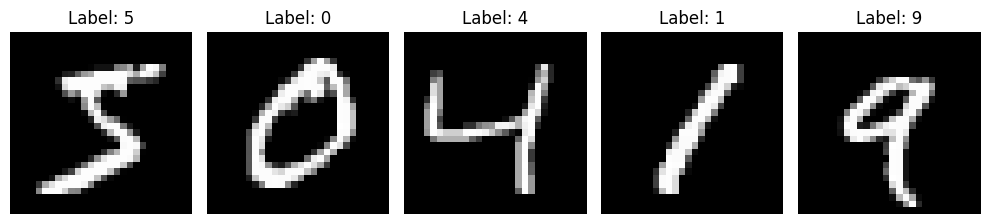

In [6]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 5

# Displaying random images from the training set
plt.figure(figsize=(10, 5))

# Loop to display the images
for i in range(num_images):
    plt.subplot(1, num_images, i+1)  # Create a subplot (1 row, num_images columns)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Reshape and plot each image
    plt.title(f"Label: {y_train[i]}")  # Show the label
    plt.axis('off')  # Turn off axis labels

# Show the images
plt.tight_layout()
plt.show()

**Explanation:**

- ``plt.subplot(1, num_images, i+1)``: Creates a row with multiple columns to show several images side by side.

- ``plt.imshow(x_train[i].reshape(28, 28), cmap='gray')``: Reshapes the image from the 28x28x1 format back to 28x28 and plots it using grayscale (cmap='gray').

- ``plt.title(f"Label: {y_train[i]}")``: Displays the true label for each image.

3. **Define the Neural Network Model:**

We’ll create a simple feedforward neural network (fully connected layers). You can experiment with more complex architectures later.

In [7]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons for the 10 classes (digits 0-9)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


- **`layers.Flatten(input_shape=(28, 28))`**:
   - This layer flattens each 28x28 pixel image into a 1D vector of 784 values (28 * 28 = 784). This is necessary because the fully connected layers expect 1D input, not 2D (images).

- **`layers.Dense(128, activation='relu')`**:
   - A **fully connected layer** with 128 neurons. Each neuron in this layer receives input from every element in the flattened input vector.
   - The `activation='relu'` means it uses the **ReLU (Rectified Linear Unit)** activation function, which helps introduce non-linearity to the model and allows it to learn complex patterns.

- **`layers.Dense(10, activation='softmax')`**:
   - The output layer, which has 10 neurons, one for each possible digit (0-9).
   - The `activation='softmax'` means that the output will represent a probability distribution across the 10 classes. Each output value will be between 0 and 1, and the sum of all outputs will equal 1. This is useful for classification tasks, as the model will output the probability of each class.


The model takes a 28x28 pixel image, flattens it, passes it through a hidden layer with 128 neurons (using ReLU activation), and then outputs probabilities for the 10 possible digits (0-9) using softmax activation.

4. **Compile the Model:**

The model needs to be compiled with a loss function, optimizer, and evaluation metric.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Explaination:**

- **Optimizer**: Adam is a popular optimizer that adapts the learning rate during training.
- **Loss Function**: Sparse categorical cross-entropy is used for multi-class classification.
- **Metrics**: Accuracy is used to evaluate the performance of the model.

5. **Train the Model:**

Now, we can train the model using the training data.

In [9]:
model.fit(x_train, y_train, epochs=5)  # Train for 5 epochs

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8726 - loss: 0.4539
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9641 - loss: 0.1216
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9756 - loss: 0.0807
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0552
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9875 - loss: 0.0426


**Accuracy:**

Accuracy measures how often the model's predictions are correct. It is the percentage of correctly classified instances out of the total number of instances.

In this case, the model accuracy increases, indicating that the model is becoming better at classifying the MNIST images correctly as training progresses.

**Loss:**

Loss (often referred to as "cost") is a measure of how far off the model's predictions are from the true values. It quantifies the error made by the model in each prediction.

In the output, the loss decreases, showing that the model is reducing the error as it learns over the epochs.

Common loss functions include categorical crossentropy (for classification tasks) and mean squared error (for regression tasks). In this case, it’s likely categorical crossentropy because you're performing a classification task with 10 output classes.

6. **Evaluate the Model:**

After training, we can evaluate the model’s performance on the test data.

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0964
Test accuracy: 0.9771999716758728


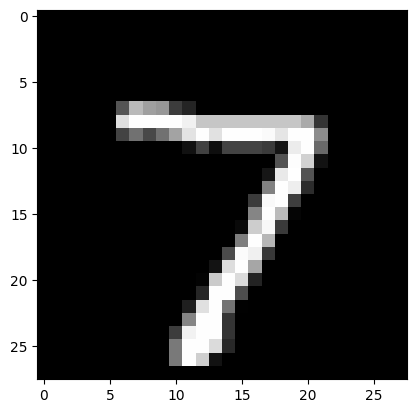

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted label: 7, Actual label: 7


In [11]:
import matplotlib.pyplot as plt
# Get the first image from the test set
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()

# Predict the digit
pred = model.predict(x_test[:1])
predicted_label = pred.argmax()
print(f'Predicted label: {predicted_label}, Actual label: {y_test[0]}')

### **5. Visualizing the Results**

You can visualize how the neural network performs by predicting on test data and plotting some sample images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Index: 1405, Predicted: 5, Actual: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Index: 873, Predicted: 2, Actual: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Index: 153, Predicted: 5, Actual: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Index: 9839, Predicted: 7, Actual: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Index: 9209, Predicted: 2, Actual: 2


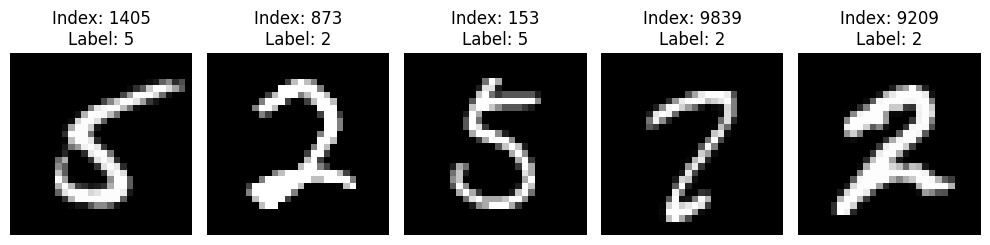

In [12]:
import numpy as np
# Set a random seed for reproducibility (optional)
np.random.seed()

# Get 5 random indices from the test set
random_indices = np.random.choice(x_test.shape[0], 5, replace=False)

# Create a figure to show the 5 random images and their predictions
plt.figure(figsize=(10, 5))

# Loop through the random indices and display the images
for i, index in enumerate(random_indices):
    plt.subplot(1, 5, i+1)  # Create a subplot with 1 row and 5 columns
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    # Add the dataset index, label, and prediction to the title
    plt.title(f"Index: {index}\nLabel: {y_test[index]}")
    plt.axis('off')  # Hide axis for better visualization

    # Predict the digit
    pred = model.predict(x_test[index:index+1])  # Predict for the single image
    predicted_label = pred.argmax()  # Get the predicted label (class)

    # Print the predicted and actual labels along with the index
    print(f'Index: {index}, Predicted: {predicted_label}, Actual: {y_test[index]}')

# Show the plot with 5 images
plt.tight_layout()
plt.show()


### **Explanation of Random Sampling**:
- `np.random.choice(x_train.shape[0], 5, replace=False)`: Selects 5 random indices from the training set without repeating them (`replace=False`).
- The images at those random indices are then displayed with their corresponding labels.

In [13]:
from google.colab import files
from PIL import Image, ImageOps
import io
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Upload the image
uploaded = files.upload()

# Get the file name
filename = next(iter(uploaded))

# Open the uploaded image using PIL
img = Image.open(io.BytesIO(uploaded[filename]))

# Display the original image and resized image side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')  # Hide the axis for a cleaner view

# Convert to grayscale
img = img.convert('L')

# Thresholding: Convert image to black and white to enhance contrast
threshold = 128  # You can adjust this value
img = img.point(lambda p: p > threshold and 255)

# Resize the image to 28x28 (matching the MNIST input size)
resized_img = img.resize((28, 28))

# Show the resized image
axes[1].imshow(resized_img, cmap='gray')
axes[1].set_title("Resized Image (28x28)")
axes[1].axis('off')  # Hide the axis for a cleaner view

# Display both images
plt.tight_layout()
plt.show()

# Preprocess the resized image: Normalize and reshape
img_array = np.array(resized_img) / 255.0  # Normalize to [0, 1]

# Reshape the image to match the input shape for the model: (1, 28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

# Print the shape of the image array (should be (1, 28, 28, 1))
print(f"Shape of the image: {img_array.shape}")

# Load your pre-trained model (if not already loaded)
# For example, assuming the model is saved or defined as 'model':
# model = tf.keras.models.load_model('your_model_path')  # Uncomment if loading a saved model

# Predict the digit using the trained model
pred = model.predict(img_array)

# Get the predicted label (the digit)
predicted_label = pred.argmax()

# Print the prediction
print(f'The predicted digit is: {predicted_label}')


MessageError: RangeError: Maximum call stack size exceeded.

# **6. Conclusion**

In this lecture, we learned the following:

The basic structure of a neural network, including layers, neurons, and activation functions.

How to implement a simple neural network using TensorFlow/Keras to classify hand-written digits (MNIST dataset).

The process of training and evaluating a neural network.

By understanding these fundamentals, you can start building and experimenting with more complex neural networks for various machine learning tasks.

Next Steps:

Explore deeper architectures (e.g., Convolutional Neural Networks for image data).
Experiment with more complex datasets and tasks.

https://en.wikipedia.org/wiki/MNIST_database

---



Made by Gareth A. Harrison @ BINUS ASO '27